<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML3_RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **3. Classificação e Regressão Logística**
---

Nesta aula você vai aprender sobre:

*	O Aprendizado Supervisionado para Classificação
*	As Principais Métricas de Classificação
*	O que é o Dilema Bias-Variância



Na aula anterior você pôde entender a diferença entre problemas de **Regressão** e de **Classificação**, e aprendeu a criar modelos para a predição de valores com modelos de Regressão Linear. Tanto a Regressão como a Classificação são modelos de **Aprendizado Supervisionado**, e envolvem um conjunto de dados de treinamento com exemplos de entradas e saídas rotuladas.

Nesta aula vamos começar a explorar os modelos Classificação. Esses modelos serão nosso foco a partir de agora ao longo de todo o curso! Mas vamos começar, nesta aula, aprendendo um único modelo de Classificação, denominado **Regressão Logística**, e algumas métricas que permitem *medir* a eficiência desse modelo à exemplo do que você viu no coeficiente de determinação ($R$-$Square$) para modelos de Regressão Linear.

Você vai entender também que, nem sempre um modelo que responde corretamente à 100% dos dados de treinamento será um bom modelo. É o dilema conhecido como **Dilema Bias-Variância**, e um problema que frequentemente surge ao trabalharmos com dados e que você precisa saber lidar. 




Modelos de Regressão estimam valores ou quantidades, como a área média de um tumor a partir de outras medidas como raio e textura médias. Já os Modelos de Classificação estimam a partir dos atributos de entrada categorias, como 'M'aligno ou 'B'enigno no exemplo abaixo.



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ClassificationRegressionBreastCancer2.png" width=800, align="center">



<small>

<b>
Figura 1. Modelos de Regressão X Classificação. Modelos de Regressão estimam valores ou quantidades, enquanto Modelos de Classificação estimam categorias como no exemplo acima 'M'aligno ou 'B'enigno.

Para essa tarefa de Classificação em diferentes categorias, Maligno/Benigno, Fraude/Não Fraude, Spam/Não Spam, ou mesmo categorias não binárias, como Edifícios, Pessoas ou Paisagens em uma classificação de fotos, existem diversos modelos e, nesta aula, nos deteremos no modelo de Regressão Logística. Todos os modelos que veremos, seguem o mesmo esquema de Modelos Supervisionados e, por isso, é importante que você fique atento às características que serão comuns à vários modelos de classificação (como as métricas de eficiência, esquema geral de implementação etc.).

<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide4.PNG" width=800, align="center">

<small>

<b>
Figura 2. Esquema geral dos Modelos de Aprendizado Supervisionado e diferentes Modelos de Regressão e Classificação.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Regressão Logística: *Classificador Logístico*

Antes de começarmos a falar de Regressão Logística um ponto de atenção: você não deve confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de Classificação. Embora isso possa ser claro quando você lê este texto ou vê as figuras acima, o fato de carregar o nome *Regressão*, na Regressão Logística é fonte geral de confusão. Melhor seria se adotassemos a denominação *Classificador Logístico* evitando-se assim a confusão. 

A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

O fato de somente classificar categorias Dicotômicas fica claro quando você pensa que saída do modelo é uma única probabilidade $P$, por exemplo a de ser benigno $P(Y=Benigno)$ e que, portanto, podemos apenas obter agora a probabilidade de não ser benigno,  $P(Y \ne Benigno) = 1 - P(Y = Benigno)$. Isso pode parecer uma grande limitação, mas na verdade você sempre pode dividir um problema multiclasse (Edifícios/Pessoas/Paisagens ou Conservador/Moderado/Agressivo) em vários problemas binários (pense, como você faria isso?). 

<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/linearregressionlogitbreast1.PNG?raw=true" width=1200> 

<small>

<b>
Figura 3. Modelos matemáticos da Regressão Logística e Linear. 

Para obter essa probalidade a regressão logística buscará os melhores coeficientes em uma expressão semelhante a que empregamos na regressão linear. É uma expressão que emprega uma combinação linear das variáveis preditoras à qual aplicamos a função logística $\sigma(x)=\frac{1}{1+e^{-x}}$. Vamos ver como chegamos a essa expressão.




## Modelo logístico

Para obtermos essas probabilidades, a regressão logística modela o que é conhecido como log de probabilidades:

$$ log( \frac{p}{1-p}) = a_0 + a_1 x_1 + ... + a_n x_n $$

Os resultados da regressão logística vão então informar sobre as chances ('Odds') e razão das chances ('Odds Ratio') e não exatamente probabilidades (por exemplo, em alguns casos os valores podem não ter soma 1), mas podemos entender de qualquer modo que uma *chance* reflete em uma probabilidade maior daquele evento ocorrer. Se um evento tem probabilidade $p$, suas chances são $p / (1-p)$, e é por isso que a esquerda lado é chamado de "odds logarítmicas" ou "logit", e podemos obter a 
probabilidade de chances invertendo a função acima:

$$ p = 1 / (1 + e^{- ( a_0 + a_1 x_1 + ... + a_n x_n ) })$$

Essa função é conhecida como  função logística ou sigmóide, $\sigma$, é definida como:


$$\sigma(x)=\frac{1}{1+e^{-x}}$$


Ela tem o seguinte gráfico:



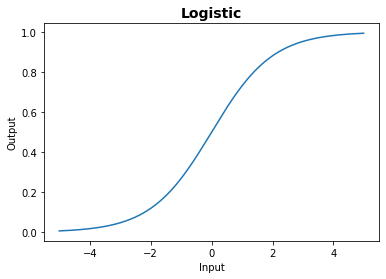

In [ ]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

e desempenha um papel importante em outros modelos, como os modelos neurais. Note que os valores dessa função variam de 0 a 1 e é portanto, possível empregar essa função como uma medida de probabilidade, ou das chances. 

Esse procedimento funciona muito melhor para classificação que a regressão linear e podemos usar 0.5 como o valor limite de probabilidades entre as classes, isto é, valores $p < 0.5$ para uma classe e valores $p \ge 0.5$ para outra. 

## Estimando os parâmetros

Estimar os valores dos coeficientes $a_0, a_1, ...$. pode seguir a mesma estratégia empregada para calcular os coeficientes de uma regressão múltipla e empregamos um otimizador, como o método de mínimos quadrados.

Do mesmo modo que na regressão linear você deseja minimizar o erro ou maximizar os *acertos* do modelo. Para cada amostra que  pertence à classe '1', você irá querer que $p$ fique mais próximo de $1$ enquanto, para cada amostra que não  pertence à classe '1', você quer que $p$ seja o mais próximo de $0$ possível. As diferenças consistem no erro que queremos minimizar e podemos então, a partir de valores iniciais de dos coeficientes $a_0, a_1, ...$ empregar um método de otimização como o de mínimos quadrados, ou um método gradiente, para obter  os coeficientes que fornecem o menor erro. 




# Classificando *Moons* e Empréstimos 

Vamos começar classificando um conjunto aleatório de dados que denominaremos *Moons*. Cada um dos 100 pontos, *moons*, possui 2 atributos e recebe uma classe $1$ ou $0$.

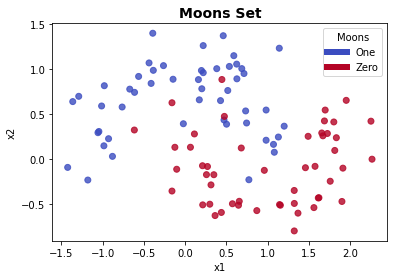

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

Talvez você considere esse problema um problema pouco interessante, afinal estamos apenas gerando dados aleatórios. Esse exemplo de *brinquedo*, entretanto, já traz os elementos essencias que precisamos saber para criar classificadores supervisionados e poderíamos  igualmente ter uma base com dados de empréstimos, com idade e valor dos empréstimos tomados pelos clientes, classificados entre empréstimos pagos ou inadimplentes (*default*) para prever concessões de novos empréstimos. 

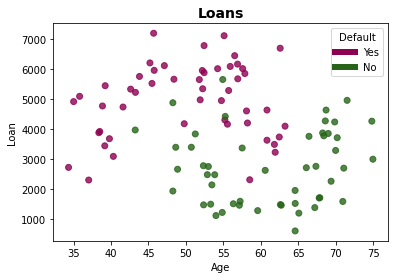

         age         loan  default
0  41.604235  4732.639984        0
1  45.688635  7188.319998        0
2  64.570169  1522.549822        1
3  52.984240  2752.321406        1
4  74.792752  4261.263330        1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df_loans = pd.DataFrame({'age':X[:, 0], 'loan':X[:, 1], 'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['Yes', 'No'], loc='upper right',title='Default')

plt.show()

print(df_loans.head())

Vamos então entender como empregar o classificador logístico do `scikit-learn` neste exemplo de brinquedo, entendendo cada passo e que são empregados depois para quaisquer outros algoritmos supervisionados.



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">

<small>

<b>
Figura 4. Esquema geral de Implementação de Modelos Supervisionados com estimadores do SciKit-Learn. 


1. **Definimos as Entradas e Saídas do Modelo**. Seus recursos e rótulos.
2. **Definimos a Classe de Modelos a ser empregada**. 
3. **Treinamos o Modelo**. Isto é, buscam-se os parâmetros que melhor ajustam o modelo aos dados.
4. **Prevemos novos casos**. Aplicamos o modelo para novos casos.



## Import dos Estimadores

Antes de mais nada podemos importar os pacotes necessários para a execução do nosso modelo. 

Cada algoritmo de aprendizado na API  do scikit-learn é exposto como  objeto chamado de *estimador*. Por exemplo, você viu que para a regressão linear há o estimador `sklearn.linear_model.LinearRegression`, para a regressão logística o estimador será o `from sklearn.linear_model import LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression 


## Definimos as Entradas e Saídas do Modelo

Essa operação pode requerer uma série de transformações e seleções dos dados e, normalmente, é uma parte bastante custoza da implementação completa dos modelos. Mas aqui nossos dados são bastante simples e podem ser empregados diretamente sem qualquer preparação.

In [ ]:
X = df[['x1','x2']]
y = df.y


## Definimos a Classe de Modelos cpm seus Parâmetros

Fazemos isso isnstanciando o modelo com seus parâmetros.

In [ ]:
clf = LogisticRegression(max_iter=1000)
print(clf)

LogisticRegression(max_iter=1000)


E empregamos o nome `clf` arbitrariamente apenas para designar nosso classificador e o parâmetro `max_iter` define o número máximo de iterações que o otimizador irá empregar para obter numericamente, por aproximações sucessivas, os melhores coeficientes do modelo.

## Treinamento do Modelo 

Os parâmetros ou coeficientes do modelo são obtidos com a função `fit()`, buscando os melhores parâmetros ou coeficientes que se ajustam aos dados através de um otimizador (`solver`).

In [ ]:
clf.fit(X,y)

print( clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


Os valores `coef_` e `clf.intercept_` são os parâmetros estimados para regressão logística e irão variar de modelo para modelo.

## Predição 

O método `predict()` fornece então a predição de dados com base nos parâmetros estimados do modelo.  

In [ ]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é  útil quando se deseja refinar os resultados ou ainda desejamos empregar esses valores para solução de problemas multiclasse.

In [ ]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [ ]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

# Classificação de Fraudes e Tumores

Para concluir o mesmo se aplicaria, e os mesmos códigos poderiam ser empregados, se você quisesse implementar um modelo para detecção de  detecção de fraude de transações de cartão de crédito com base nos Valores da operação e uso do cartão nas últimas 24h, duas variáveis reconhecidas como fortes preditoras de fraude de cartões. O modelo empregado seria então,

$$ P(\text{Fraude} | \text{Valor, Trans24h}) = \frac{1}{ (1 + e^{- ( a_0 + a_1 \text{Valor} + a_2 \text{Trans24h} ) })}$$




 



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLLogistic.png" width=800, align="center">

<small>

<b>
Figura 5. Esquema geral do Modelo Logístico aplicado à classificação de Fraudes em operações com Cartões. 

Depois de estimados os coeficientes $a_0, a_1, a_2$ com base nas amostras conhecidas, você poderia aplicar dados de uma nova operação `(Valor,Trans24h)` para estimar a chance da operação ser ou não uma fraude. Um modelo análogo poderia ser também aplicado igualmente à classificação dos tumores Malignos ou Benignos que você viu no início da aula.

# Score do Modelo: Acuracidade

Por último podemos medir a eficiência do nosso modelo, diretamente ou ainda a partir do `score()`. 

In [ ]:
clf.score(X,y)

0.87

Esse score de $0.87$, corresponde à **Acuracidade do Modelo** sobre o nosso conjunto de treinamento `X`, isto é, o percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto. Você pode obter o mesmo valor apenas contando o número de acertos da predição sobre o total de casos. 


 

In [ ]:
sum( clf.predict(X) == y ) / len(X)

0.87

Ou ainda construir uma tabela para comparar os acertos e erros dos modelo.

In [ ]:
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df


,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


Veja que a maioria dos casos é classificado corretamente, mas existem casos onde o valor previsto do modelo difere do valor encontrado nos dados.

Essa medida é uma medida de **eficiência do modelo** e, à exemplo do $R$-$Square$ que você aprendeu na Regressão Linear, nos diz o quanto os dados correspondem ao modelo que foi obtido. Mas, como você aprenderá mais adiante, esta é apenas uma das primeiras métricas que podemos empregar para medir a eficiência do modelo e há ainda outras formas melhores de se obter esses valores. 

No caso desse problema bastante simples, visualizar os erros e acertos do modelo o que, em geral, não será possível com dados com muitas dimensões e instâncias.

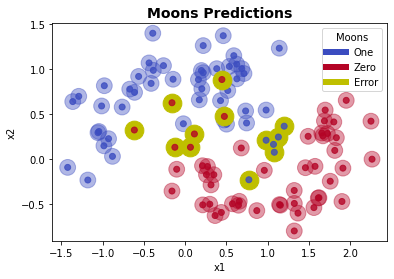

In [ ]:
cmap_data = plt.cm.coolwarm 

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



E podemos ainda verificar a *fronteira de decisão* do estimador.

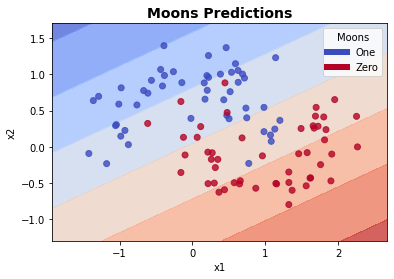

In [ ]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)  
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

# CASO: Estimando o tipo de Transmissão dos Veículos

Você vai empregar agora o mesmo conjunto de dados anterior para prever a classe de transmissão dos veículos, isto é, se os veículos tem ou não transmissão manual. Para isso vamos empregar aqui o pacote `scikit-learn`, um pacote que será empregado para muitos outros modelos de aprendizado de máquina.

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make,predicted
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,18.953203
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,27.675476
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,23.605082
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,23.605082
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,28.838446


In [ ]:
df.Mantransavail.value_counts()

Yes    61
No     32
Name: Mantransavail, dtype: int64

## Preparação dos Dados

`Mantransavail` é um atributo binário e portanto podemos aplicar a regressão logística para obter um modelo de classificação. Mas para a regressão logística com o `scikit-lean` precisamos ter os valores de classe como $0$ ou $1$, e vamos medir a probabilidade do valor se *verdadeiro*, isto é, $1$. Vamos, portanto, criar um novo atributo  em que o valor $1$ vai designar os veículos manuais e $0$ os veículos de transmissão exclusivamente automática.

In [ ]:
df['Manual'] = df['Mantransavail'].apply(lambda x: 1 if 'Yes' in x else 0)

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make,predicted,Manual
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,18.953203,1
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,27.675476,1
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,23.605082,1
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,23.605082,1
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,28.838446,1


In [ ]:
df.Manual.value_counts()

1    61
0    32
Name: Manual, dtype: int64

Vamos então definir algumas variáveis independentes e a variável dependente do treinamento, lembrando que você deve empregar variáveis numéricas no modelo logístico.

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin', 'Make',
       'predicted', 'Manual'],
      dtype='object')

In [ ]:
X_train = df[['EngineSize', 'Horsepower', 'RPM', 'Price', 'Weight']]
y_train = df['Manual']


In [ ]:
from sklearn.linear_model import LogisticRegression  # para configurar o modelo.. 

# criando o modelo
logreg = LogisticRegression()

# treinando o modelo
logreg.fit(X_train,y_train)



LogisticRegression()

O treinamento do modelo fornece então os seguintes coeficientes:

In [ ]:
logreg.coef_

array([[-0.84623734,  0.00713032,  0.00141883, -0.01854519, -0.00161397]])

## Avaliando o Modelo

Existem muitas métricas e formas de avaliação e você vai estudar mais sobre isso adiante. Por hora vamos no deter apenas em verificar o número de *acertos* do nosso preditor.

In [ ]:
y_pred = logreg.predict(X_train)

df['Manual_predict'] = y_pred

df[['Manual','Manual_predict']]

,Manual,Manual_predict
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
89,1,0
90,1,1
91,1,1
92,1,1


Podemos fazer isso como acima, fazendo a predição dos valores do nosso conjunto e comparando com os valores *reais*, e você pode ainda obter o percentual de acertos do modelo:

In [ ]:
sum( df['Manual'] == df['Manual_predict'] ) / len(df)

0.8279569892473119

Nada mal, não é mesmo? Esse é o *score* do modelo ou a acuracidade, o percentual de acertos do nosso modelo, e pode ser também obtido como: 

In [ ]:
logreg.score(X_train, y_train)

0.8279569892473119

# Dilema Viés-Variância

Agora que sabemos como construir modelos Supervisionados para estimar valores e classes de dados, vamos nos deter um pouco sobre como avaliar melhor esses modelos. Afinal, parece bastante simples construir esses modelos, mas construir bons modelos pode ser de fato uma tarefa bastante difícil. 

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*). 

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos. 

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados. 



## Exemplo em Modelos de Regressão

O underfitting/overfitting pode ocorrer tanto em modelos de regressão como em modelos de classificação. O exemplo a seguir demonstra o problema de underfitting/overfitting para um caso de regressão. 

Automatically created module for IPython interactive environment


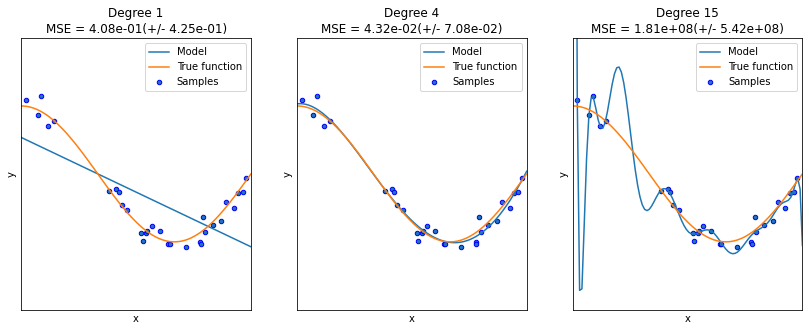

In [ ]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

A função que queremos aproxima é uma parte da função cosseno (linha laranja) e foram empregados modelos polinomiais de diferentes graus para aproximar a função (regressão). A função linear (polinômio com grau 1, linha azul) claramente é insuficiente para ajustar os dados de treinamento (underfitting). Um polinômio de grau 15 entretanto ajusta a maior parte dos pontos de dados do conjunto de treinamento, mas aprende desse modo todo o *ruído* ou variância dos dados, o que leva a um modelo (linha azul) que claramente falhará na predição de valores de novos casos (overfitting). O polinômio de grau 4, por outro lado, parece aproximar a função verdadeira quase perfeitamente. 



## Exemplo em Modelos de Classificação

Isso pode igualmente ocorrer em modelos de Classificação.

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true)


<small>
<b>
Exemplos de underfitting e overfitting (Produzido com https://ml-playground.com/#)

Na figura acima o primeiro classificador é simplesmente um separador linear e erra ao classificar vários pontos de dados do conjunto de treinamento - é um modelo muito simples que não representa um modelo da classificação dos dados. Por outro lado, o terceiro modelo, captura toda a variância do conjunto de treinamento e classifica todas as instâncias corretamente, o que certamente, levará a falha de classificação de novos casos. 

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste2.png?raw=true)

> Isso pode ficar mais claro se você pensar do seguinte modo. Olhe os pontos grandes em vermelho da figura acima. Considere que eles seriam novos casos que você deve classificar. São novos casos, e você pode pensar no nosso exemplo de empréstimos, você não sabe antecipadamente se o cliente irá ou não pagar o empréstimo, mas você deseja definir a classe mais provável com base nos casos anteriores. Em quais classificações você apostaria? Certamente a classificação do meio. O primeiro é um modelo insuficiente para capturar todo o viés dos dados, e o terceiro, erra ao capturar todo o viés dos dados não generalizando suficientemente novos casos.

# Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser pefeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste). 

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo 

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados *Moons*. 




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

### Recriando os dados de *Moons*

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

### Modelo *sem* a Separação dos Conjuntos de Treinamento e Teste

Este é um  modelo básico, mas com uma abordagem metodologicamente pois, ao empregar o mesmo conjunto para treinamento e a medida de desempenho do modelo pode levar ao sobre ajuste do modelo, e consequente erro de generalização.  

In [ ]:
from sklearn.linear_model import LogisticRegression 

X = df[['x1','x2']]
y = df.y

clf = LogisticRegression(max_iter=1000)

clf.fit(X,y)

y_pred = clf.predict(X)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


[0 0 1 1 1 1 1 0 0 0] ...
0.87


### Modelo *com* a Separação dos Conjuntos de Treinamento e Teste

Aqui a  abordagem correta, emprega conjunto diferentes treinamento e teste escolhidos aleatoriamente sobre os dados originais.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


[0 1 0 0 0 0 1 1 0 1] ...
0.86


O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. O parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o pârametro `random_state=123` é para a reprodutibilidade dos resultados.



Abaixo, a inspeção visual, mostrando apenas 2 erros de classificação no conjunto de teste.

In [ ]:
sum(y_test != y_pred)

2

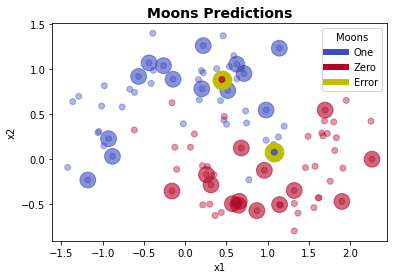

In [ ]:
cmap_data = plt.cm.coolwarm 

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



# CASO: 10 year risk of coronary heart disease CHD

Aqui o objetivo da classificação é prever se o paciente tem 10 anos de risco de futura doença cardíaca coronariana (ACS). O conjunto de dados fornece informações de mais de 4.000 pacientes residentes da cidade de Framingham, Massachusettse com 15 atributos. 

A variável objetivo é `TenYearCHD`, *10 year risk of coronary heart disease CHD* (onde “1”, significa “Yes”, “0” significa “No”)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Preparação dos Dados

As variáveis preditoras são todas numéricas e não há, portanto, necessidade do hot encode dos atributos. Há entretanto valores ausentes.

In [ ]:
df.isnull().sum() / len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

O percentual é pequeno e assim vamos simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


## Aplicando o Modelo Logístico

Aplicamos o modelo ajustando agora as entradas `X` e `y` para o modelo. O `max_iter` do regressor também foi ajustado para $10000$ uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência do parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

[0 0 1 0 0 0 0 0 0 0] ...
0.8523783488244943


## Predição de Novos Casos

Se considerarmos 0.85 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [ ]:
clf.predict(X_new)

array([0, 0])

Surpreendentemente esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()
clf.predict(X_new)

array([0, 1])

# Outras Métricas: Matriz de Confusão e Classification Report

O resultado de 0.85 parece à primeira vista um resultado bastante satisfatório. Mas uma análise mais detalhada de outras métricas irá mostrar que esse resultado não é tão bom quanto parece. Algumas dessas métricas encontram-se abaixo e você vai ver em detalhe cada uma delas.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade:\n')
print(accuracy)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, labels=[1,0]))


Matriz de Confusão:

[[ 14 153]
 [ 11 920]]

Score de Acuracidade:

0.8506375227686703

Classification Report:

              precision    recall  f1-score   support

           1       0.56      0.08      0.15       167
           0       0.86      0.99      0.92       931

    accuracy                           0.85      1098
   macro avg       0.71      0.54      0.53      1098
weighted avg       0.81      0.85      0.80      1098



## Matriz de Confusão

Uma matriz de confusão é uma matriz quadrada, $n \times n$ para avaliar o desempenho de modelos de classificação e onde $n$ é o número de classes objetivo. Lembrando que avaliamos o modelo sobre os resultados no conjunto de teste, a matriz compara os valores reais (conjunto de teste) com aqueles estimados pelo modelo. Ela permite uma visão mais ampla do desempenho do modelo, que a simples medida de acuracidade, pois permite identificar os tipos de erros que o modelo está cometendo.

Em problema de classificação binária, como no nosso exemplo anterior, a matriz de confusão é uma matriz $2 \times 2$ com o seguinte formato:




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/matriz_de_confusao.png?raw=true) 

A ordem dos labels, se não especificada será a ordem alfabética. Como no nosso caso '1' significa o caso positivo, isto é, a presença da doença cardíaca coronariana, colocamos a ordem [1,0] que será mais adequada para nossos propósitos.

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 1 \t 0')
print('\t\t' + 29*'-')
print('      y_test \t 1   | \t ' + str(cm[0,0]) + '\t' + str(cm[0,1]) + '   |  ' + str(cm[0,0] + cm[0,1]))
print('\t\t 0   | \t ' + str(cm[1,0]) + '\t' + str(cm[1,1]) + '   |  ' + str(cm[1,0] + cm[1,1]))
print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,0] + cm[1,0]) + '\t' + str(cm[0,1] + cm[1,1]) + '  |  ')


Matriz de Confusão:

			    y_pred 

			 1 	 0
		-----------------------------
      y_test 	 1   | 	 14	153   |  167
		 0   | 	 11	920   |  931
		-----------------------------
		     | 	 25	1073  |  


É um bom exercício para entender essa matriz verificar alguns de seus valores, como por exemplo a soma das linhas e colunas: 

In [ ]:
print( (y_test == 1).sum(), (y_test == 0).sum() )
print( (y_pred == 1).sum(), (y_pred == 0).sum() )

167 931
25 1073


De fato 167, 931 (soma das linhas) correspondem às quantidades de elementos reais classes 1 e 0 em `y_test`. Já os valores 25 e 1073 (soma das colunas) correspondem às quantidades de elementos previstos nas classes 1 e 0 em `y_pred`. 

E você ainda pode verificar as instâncias classificadas corretamente para cada classe, que são os elementos da diagonal em que coincidem das classes reais e previstas pelo modelo.

In [ ]:
print( ( y_test + y_pred == 2 ).sum() )
print( ( y_test + y_pred == 0 ).sum() )

14
920


Dessa matriz ainda saem os valores,

* Verdadeiro positivo (TP), em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* Verdadeiro negativo (TN), em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* Falso Positivo (FP), Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo

* Falso negativo (FN), Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo

Esses valores já permitem você identificar que nosso modelo com 0.85 de acurácia já não parece tão bom e para isso basta você notar o número de falsos negativos, *erro tipo 2*. E no caso esse é o erro mais grave, pois dizemos a uma pessoa que ela não está doente quando ela realmente está!

Que dão origem a dezenas de métricas e nos deteremos aqui apenas nas mais importantes.

## Acuracidade

Você já conhece essa métrica e apenas vamos verificar que, como outras métricas, ela pode ser obtida diretamente da matriz de confusão: 

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$

Note que $TP+TN$ é a soma dos valores diagonais, ou o total de acertos, e $TP+FP+TN+FN$ é simplesmente a soma de todos valores, ou o total de casos.

$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


Matriz de Confusão:

[[ 14 153]
 [ 11 920]]

TP =  14 
FP =  153 
FN =  11 
TN =  920


In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Accuracy

0.8506375227686703

## Precisão e *Recall*

Outras duas métricas importante são a Precisão e o *Recall*,

$$ Precision = \frac{TP}{TP + FP} $$

e

$$ Recall = \frac{TP}{TP + FN} $$


Mas o que de fato essas métricas nos dizem? Você dificilmente irá guardar essas fórmulas. Mas é mais importante, e talvez até mais fácil, entender o conceito por trás dessas métricas o que já nos dá um modo direto de calcular os seus valores. A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previstos corretamente. Note que é a exata noção de precisão que temos. 
O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! 


In [ ]:
Precision = TP/(TP + FP)
Precision

0.08383233532934131

In [ ]:
Recall = TP/(TP + FN)
Recall

0.56

Os valores acima são os valores para a classe 1, e esses mesmos valores você pode observar no `classification_report` do `scikit-learn`. 

A última métrica é o F1-score que pode ser entendido como uma média harmônica dos valores de precisão e recall:

$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

Na prática, quando tentamos aumentar a precisão do nosso modelo, o recall diminui e vice-versa. A pontuação F1 permite capturar ambas as tendências em um único valor e, por isso é bastante empregada sendo seu valor máximo quanto a precisão e o recall são iguais.



In [ ]:
F1_score = 2 / ( (1/Recall) + (1/Precision) )
F1_score

0.14583333333333331

## Classification Report

Todos  conceitos acima são importantes para entendermos as métricas, mas todas essas métricas são mais facilmente obtidas no `classification_report`.

In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, labels=[1,0]))


Classification Report:

              precision    recall  f1-score   support

           1       0.56      0.08      0.15       167
           0       0.86      0.99      0.92       931

    accuracy                           0.85      1098
   macro avg       0.71      0.54      0.53      1098
weighted avg       0.81      0.85      0.80      1098



Além das métricas que já discutimos você encontra os valores de suporte, que nada mais são que as quantidades de casos de cada classe. Esse valor é importante para identificarmos classes desbalanceadas e são empregados para o cálculo das médias ponderadas das métricas `weighted avg`. O `macro avg`, por outro lado, é apenas a média das métricas de todas as classes de dados. 

## Análise Final

Como você pode ver, apesar da acuracidade de $0.85$ do nosso modelo, ele acerta apenas pouco mais que uma moeda ($0.5$ é são as chances de cara ou coroa),  $0.56$, dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. 

Dados com classes desbalanceadas como esse (são somente 167 elementos da classe 1 para 931 casos da classe 0) são bastante comuns e casos até bastante mais desbalanceados, com 1/100 ou 2/100, nos casos de *churn de clientes*, *fraude de transações* ou mesmo diagnósticos de doenças graves, e em todos esses casos é uma felicidade que a classe de maior risco seja realmente bastante menor. Mas para o aprendizado de máquina isso é um grande problema pois permite atingirmos facilmente uma acuracidade geral alta apesar do mal desempenho do modelo.






## Um Caso Trivial

O exemplo abaixo ilustra bem o problema de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 2 | 3 |
| Benigno | 0 | 95 |

O modelo tem 0.97 de acuracidade, mas falha na maior parte dos casos na detecção de tumores malignos. Felizmente as amostras de tumores malignos é bastante menor que os casos benignos. Mas desse modo, mesmo um modelo trivial que classifica-se *qualquer* caso como benigno teria 0.95 de acerto!


# Síntese

Nesta trilha aprendeu alguns retomamos os problemas de aprendizado supervisionado, de regressão e classificação, para entender de modo geral como podemos empregar esses modelos com a biblioteca `scikit-learn` e você pode entender como instanciar um estimador, aplicar o treinamento, e fazer predições e medir o desempenho dos modelos obtidos. 

Você aprendeu também sobre o Dilema Viés-Variância, e uma regra básica para buscarmos evitar o sobreajuste dos modelos dividindo o conjunto inicial de dados em dados para treinamento e teste. A partir daí verificamos algumas das métricas básicas para medir o desempenho dos modelos como Matriz de Confusão, Precisão, *Recall* e *F1-score*. 

É importante que você saiba que ainda existem muitas outras técnicas e métricas envolvendo o desempenho dos modelos que não tratamos aqui, como a curva ROC (Receiver Operating Characteristic Curve), uso da validação cruzada (Cross Validation), Curva de Aprendizado ou Regularização. Isso permite você entender que a avaliação e obtenção de desempenho dos modelos não é uma tarefa fácil e voltaremos em alguns desses pontos mais adiante. 


# Para Saber Mais


* Quer conhecer outras métricas obtidas a partir da Matriz de Confusão? São dezenas... rs. Acesse então **Precision and Recall** https://en.wikipedia.org/wiki/Precision_and_recall e **Confusion Matrix** https://en.wikipedia.org/wiki/Confusion_matrix e aproveite para ver outras referências nessas páginas.

* Você saberia aplicar os conceitos de Precisão e Recall quando temos mais de duas classes para a variável objetivo? Pense um pouco e depois acesse **Computing Precision and Recall for Multi-Class Classification Problems** http://text-analytics101.rxnlp.com/2014/10/computing-precision-and-recall-for.html. 

* Não estudamos aqui a curva ROC (Receiver Operating Characteristic Curve), mas esse é um recurso que muitas vezes aparece na avaliação de modelos de classificação. Embora bastante sintético este artigo **Classification: ROC Curve and AUC**, disponível em https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc é uma boa introdução a Curva ROC e é uma oportinidade também de você acessar o **Machine Learning Crash Course** da Google que traz vários temas com uma abordagem bastante interessante.

* Acesse o Livro Digital Larose, et. al. (2019) **Data Science Using Python and R**, **E-book disponível na Biblioteca do Mackenzie**. O Capítulo 7 é todo dedicado á avaliação de modelos.

* Esse é um tema bastante avançado, mas se você tiver interesse, pode entender o que é a Regularização de Modelos, uma técnica para se evitar o sobreajuste dos modelos durante o aprendizado, acessando o **Capítulo 5. Regressão e Regularização de Modelos** em Deep Learning I dispoível em: https://github.com/Rogerio-mack/Deep-Learning-I/blob/main/T5.ipynb

O modelo de regressão linear pode funcionar bem para regressão, mas falha na maior parte dos casos quando é aplicado para classificação. Imagine, você poderia rotular uma das classes com 0 e a outra com 1 e usar a regressão linear. Tecnicamente isso funciona e certamente você obterá os coeficientes da regressão linear, afinal para quaisquer conjuntos de pontos $(X, y)$ podemos calcular os coeficientes de um modelo linear. Mas para classificação essa abordagem apresenta muitos problemas. Como seu resultado não é uma probabilidade, mas a interpolação linear dos pontos, não há um limite significativo no qual você possa distinguir uma classe da outra. 

# Referências

Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.

Jake VanderPlas. **Python Data Science Handbook**  O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 06 de Novembro de 2021.

___. **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Acesso em: 06 de Novembro de 2021.

___. **scikit-learn: machine learning in Python** Disponível em: http://scipy-lectures.org/packages/scikit-learn/index.html Acesso em: 06 de Novembro de 2021.